In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
import joblib
import streamlit as st

In [2]:
# Save dataframe as df
df = pd.read_csv('male_players.csv')

/var/folders/nn/ll6658s95d93z1m4mj_4pqh80000gn/T/ipykernel_58279/1416188483.py:2: DtypeWarning: Columns (108) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('male_players.csv')


In [3]:
df

,player_id,player_url,fifa_version,fifa_update,update_as_of,short_name,long_name,player_positions,overall,potential,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,231747,/player/231747/kylian-mbappe/240002,24.0,2.0,2023-09-22,K. Mbappé,Kylian Mbappé Lottin,"ST, LW",91,94,...,63+3,63+3,63+3,68+3,63+3,54+3,54+3,54+3,63+3,18+3
1,239085,/player/239085/erling-haaland/240002,24.0,2.0,2023-09-22,E. Haaland,Erling Braut Haaland,ST,91,94,...,63+3,63+3,63+3,62+3,60+3,62+3,62+3,62+3,60+3,19+3
2,192985,/player/192985/kevin-de-bruyne/240002,24.0,2.0,2023-09-22,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,...,80+3,80+3,80+3,79+3,75+3,70+3,70+3,70+3,75+3,21+3
3,158023,/player/158023/lionel-messi/240002,24.0,2.0,2023-09-22,L. Messi,Lionel Andrés Messi Cuccittini,"CF, CAM",90,90,...,63+3,63+3,63+3,64+3,59+3,49+3,49+3,49+3,59+3,19+3
4,165153,/player/165153/karim-benzema/240002,24.0,2.0,2023-09-22,K. Benzema,Karim Benzema,"CF, ST",90,90,...,64+3,64+3,64+3,64+3,60+3,55+3,55+3,55+3,60+3,18+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180016,220806,https://sofifa.com/player/220806/ellis-redman/...,15.0,2.0,2014-09-18,E. Redman,Ellis Redman,CB,41,61,...,38,38,38,37,40,41,41,41,40,10
180017,225509,https://sofifa.com/player/225509/aaron-collins...,15.0,2.0,2014-09-18,A. Collins,Aaron Graham John Collins,ST,41,50,...,30,30,30,31,32,31,31,31,32,14
180018,217591,https://sofifa.com/player/217591/piotr-zemlo/1...,15.0,2.0,2014-09-18,P. Żemło,Piotr Żemło,"LM, LB",40,50,...,46,46,46,48,51-1,53-3,53-3,53-3,51-1,12
180019,222947,https://sofifa.com/player/222947/tom-davies/15...,15.0,2.0,2014-09-18,T. Davies,Thomas Christopher Davies,CB,40,49,...,36,36,36,37,39,40,40,40,39,13


In [4]:
# Remove these columns
columns_to_remove = [
    "player_id", "player_url", "fifa_update", "dob", "club_loaned_from",
    "club_joined_date", "nationality_id", "nation_team_id", "player_tags",
    "player_traits", "real_face",
    "ls", "st", "rs", "lw", "lf", "cf", "rf", "rw", "lam", "cam", "ram",
    "lm", "lcm", "cm", "rcm", "rm", "lwb", "ldm", "cdm", "rdm", "rwb",
    "lb", "lcb", "cb", "rcb", "rb", "gk", "update_as_of", "club_team_id", "dob", "league_id", "club_position",
    "club_jersey_number", "club_contract_valid_until_year", "nation_position", "nation_jersey_number", "release_clause_eur"
]


In [5]:
df = df.drop(columns=columns_to_remove)

In [6]:
# Change 'fifa_version' to integer'
df['fifa_version'] = df['fifa_version'].astype(int)

In [7]:
df[df['short_name'] == 'K. Mbappé']

,fifa_version,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,height_cm,...,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
0,24,K. Mbappé,Kylian Mbappé Lottin,"ST, LW",91,94,181500000.0,230000.0,24,182,...,88.0,26,34,32,13,5,7,11,6,NaN
18350,23,K. Mbappé,Kylian Mbappé Lottin,"ST, LW",91,95,190500000.0,230000.0,23,182,...,88.0,26,34,32,13,5,7,11,6,NaN
36885,22,K. Mbappé,Kylian Mbappé Lottin,"ST, LW",91,95,194000000.0,230000.0,22,182,...,88.0,26,34,32,13,5,7,11,6,NaN
56128,21,K. Mbappé,Kylian Mbappé Lottin,"ST, LW, RW",90,95,185500000.0,160000.0,21,178,...,84.0,34,34,32,13,5,7,11,6,NaN
75024,20,K. Mbappé,Kylian Mbappé Lottin,"ST, RW",89,95,93500000.0,150000.0,20,178,...,84.0,34,34,32,13,5,7,11,6,NaN
93538,19,K. Mbappé,Kylian Mbappé Lottin,"RW, ST",87,95,72000000.0,80000.0,19,178,...,86.0,34,34,32,13,5,7,11,6,NaN
111710,18,K. Mbappé,Kylian Mbappé Lottin,ST,83,94,41500000.0,60000.0,18,178,...,80.0,41,44,40,13,5,7,11,6,NaN
133474,17,K. Mbappé,Kylian Mbappé Lottin,LW,71,87,3100000.0,20000.0,17,178,...,67.0,38,40,37,13,5,7,11,6,NaN


In [8]:
df.columns

Index(['fifa_version', 'short_name', 'long_name', 'player_positions',
       'overall', 'potential', 'value_eur', 'wage_eur', 'age', 'height_cm',
       'weight_kg', 'club_name', 'league_name', 'league_level',
       'nationality_name', 'preferred_foot', 'weak_foot', 'skill_moves',
       'international_reputation', 'work_rate', 'body_type', 'pace',
       'shooting', 'passing', 'dribbling', 'defending', 'physic',
       'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision

In [9]:
df.head(30)

,fifa_version,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,height_cm,...,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
0,24,K. Mbappé,Kylian Mbappé Lottin,"ST, LW",91,94,181500000.0,230000.0,24,182,...,88.0,26,34,32,13,5,7,11,6,NaN
1,24,E. Haaland,Erling Braut Haaland,ST,91,94,185000000.0,340000.0,22,195,...,87.0,38,47,29,7,14,13,11,7,NaN
2,24,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,103000000.0,350000.0,32,181,...,88.0,66,70,53,15,13,5,10,13,NaN
3,24,L. Messi,Lionel Andrés Messi Cuccittini,"CF, CAM",90,90,41000000.0,23000.0,36,169,...,96.0,20,35,24,6,11,15,14,8,NaN
4,24,K. Benzema,Karim Benzema,"CF, ST",90,90,51000000.0,95000.0,35,185,...,90.0,43,24,18,13,11,5,5,7,NaN
5,24,R. Lewandowski,Robert Lewandowski,ST,90,90,58000000.0,340000.0,34,185,...,88.0,35,42,19,15,6,12,8,10,NaN
6,24,T. Courtois,Thibaut Nicolas Marc Courtois,GK,90,90,63000000.0,250000.0,31,199,...,66.0,20,18,16,85,89,76,90,93,46.0
7,24,H. Kane,Harry Kane,ST,90,90,119500000.0,170000.0,29,188,...,92.0,46,46,38,8,10,11,14,11,NaN
8,24,Vini Jr.,Vinícius José Paixão de Oliveira Júnior,LW,89,94,158500000.0,310000.0,22,176,...,79.0,32,25,18,5,7,7,7,10,NaN
9,24,Alisson,Alisson Ramsés Becker,GK,89,90,77500000.0,180000.0,30,193,...,66.0,15,19,16,86,85,85,90,89,56.0


In [10]:
df[df['player_positions'].str.contains('GK')]

,fifa_version,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,height_cm,...,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
6,24,T. Courtois,Thibaut Nicolas Marc Courtois,GK,90,90,63000000.0,250000.0,31,199,...,66.0,20,18,16,85,89,76,90,93,46.0
9,24,Alisson,Alisson Ramsés Becker,GK,89,90,77500000.0,180000.0,30,193,...,66.0,15,19,16,86,85,85,90,89,56.0
13,24,M. ter Stegen,Marc-André ter Stegen,GK,89,89,54500000.0,220000.0,31,187,...,70.0,25,13,10,86,85,89,86,91,47.0
19,24,Ederson,Ederson Santana de Moraes,GK,88,89,70000000.0,210000.0,29,188,...,70.0,29,15,8,86,82,91,86,86,64.0
22,24,J. Oblak,Jan Oblak,GK,88,88,61000000.0,90000.0,30,188,...,68.0,27,14,18,85,90,78,86,87,46.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180007,15,H. Reynolds,Harry Reynolds,GK,44,50,20000.0,2000.0,18,178,...,NaN,25,25,25,46,40,40,38,52,37.0
180010,15,E. Taşkıran,Mahmut Ertuğrul Taşkıran,GK,43,49,30000.0,2000.0,24,191,...,NaN,25,25,25,40,47,53,44,41,34.0
180011,15,B. Richardson,Barry Richardson,GK,43,43,6000.0,2000.0,44,185,...,NaN,25,25,25,35,53,21,57,31,25.0
180013,15,L. Pilling,Luke Pilling,GK,42,54,20000.0,2000.0,16,180,...,NaN,25,25,25,41,42,41,42,45,41.0


In [11]:
df['shooting'] = df['shooting'].fillna(0)

In [12]:
df['goalkeeping_speed'] = df['goalkeeping_speed'].fillna(0)

In [13]:
# List of columns to update
columns_to_update = ['pace', 'passing', 'dribbling', 'defending', 'physic']

# Update null values to zero for goalkeepers in the specified columns
for column in columns_to_update:
    df.loc[df['player_positions'].str.contains('GK'), column] = df.loc[df['player_positions'].str.contains('GK'), column].fillna(0)

# Check the update
print(df.loc[df['player_positions'].str.contains('GK'), columns_to_update].head())

    pace  passing  dribbling  defending  physic
6    0.0      0.0        0.0        0.0     0.0
9    0.0      0.0        0.0        0.0     0.0
13   0.0      0.0        0.0        0.0     0.0
19   0.0      0.0        0.0        0.0     0.0
22   0.0      0.0        0.0        0.0     0.0


In [14]:
# Check null values
print(df.isnull().sum().max())

32888


In [15]:
# Check columns with null values
df.columns[df.isnull().any()].tolist()

['value_eur',
 'wage_eur',
 'club_name',
 'league_name',
 'league_level',
 'mentality_composure']

In [16]:
df.describe()

,fifa_version,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,league_level,weak_foot,...,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
count,180021.000000,180021.000000,180021.000000,1.778680e+05,178173.00000,180021.000000,180021.000000,180021.000000,177771.000000,180021.000000,...,147133.000000,180021.000000,180021.000000,180021.000000,180021.000000,180021.000000,180021.000000,180021.000000,180021.000000,180021.000000
mean,19.621450,65.712711,70.779581,2.379142e+06,10638.01081,25.138689,181.287061,75.233356,1.380878,2.939657,...,57.837807,45.851456,47.759511,45.764783,16.509979,16.260136,16.129902,16.276951,16.615517,4.310253
std,2.838621,7.018104,6.255569,6.184358e+06,21637.41400,4.679389,6.764179,6.999181,0.750647,0.664775,...,12.305995,20.452502,21.309061,20.899683,17.661659,16.846583,16.499513,17.009393,17.971201,12.684332
min,15.000000,40.000000,40.000000,1.000000e+03,500.00000,16.000000,154.000000,49.000000,1.000000,1.000000,...,3.000000,1.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,17.000000,61.000000,66.000000,3.250000e+05,2000.00000,21.000000,176.000000,70.000000,1.000000,3.000000,...,50.000000,26.000000,27.000000,25.000000,8.000000,8.000000,8.000000,8.000000,8.000000,0.000000
50%,20.000000,66.000000,71.000000,7.500000e+05,4000.00000,25.000000,181.000000,75.000000,1.000000,3.000000,...,59.000000,51.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000,0.000000
75%,22.000000,70.000000,75.000000,1.800000e+06,10000.00000,28.000000,186.000000,80.000000,2.000000,3.000000,...,66.000000,63.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000,0.000000
max,24.000000,94.000000,95.000000,1.940000e+08,575000.00000,54.000000,208.000000,110.000000,5.000000,5.000000,...,96.000000,94.000000,94.000000,95.000000,91.000000,92.000000,95.000000,92.000000,94.000000,68.000000


In [17]:
df.head(50)

,fifa_version,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,height_cm,...,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
0,24,K. Mbappé,Kylian Mbappé Lottin,"ST, LW",91,94,181500000.0,230000.0,24,182,...,88.0,26,34,32,13,5,7,11,6,0.0
1,24,E. Haaland,Erling Braut Haaland,ST,91,94,185000000.0,340000.0,22,195,...,87.0,38,47,29,7,14,13,11,7,0.0
2,24,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,103000000.0,350000.0,32,181,...,88.0,66,70,53,15,13,5,10,13,0.0
3,24,L. Messi,Lionel Andrés Messi Cuccittini,"CF, CAM",90,90,41000000.0,23000.0,36,169,...,96.0,20,35,24,6,11,15,14,8,0.0
4,24,K. Benzema,Karim Benzema,"CF, ST",90,90,51000000.0,95000.0,35,185,...,90.0,43,24,18,13,11,5,5,7,0.0
5,24,R. Lewandowski,Robert Lewandowski,ST,90,90,58000000.0,340000.0,34,185,...,88.0,35,42,19,15,6,12,8,10,0.0
6,24,T. Courtois,Thibaut Nicolas Marc Courtois,GK,90,90,63000000.0,250000.0,31,199,...,66.0,20,18,16,85,89,76,90,93,46.0
7,24,H. Kane,Harry Kane,ST,90,90,119500000.0,170000.0,29,188,...,92.0,46,46,38,8,10,11,14,11,0.0
8,24,Vini Jr.,Vinícius José Paixão de Oliveira Júnior,LW,89,94,158500000.0,310000.0,22,176,...,79.0,32,25,18,5,7,7,7,10,0.0
9,24,Alisson,Alisson Ramsés Becker,GK,89,90,77500000.0,180000.0,30,193,...,66.0,15,19,16,86,85,85,90,89,56.0


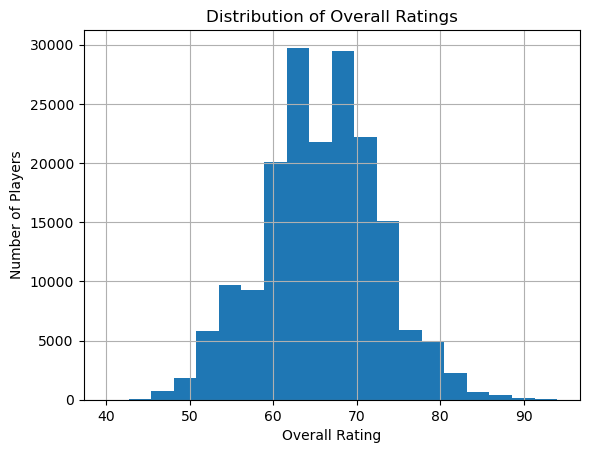

In [18]:
# Create histogram
df['overall'].hist(bins=20)
plt.title('Distribution of Overall Ratings')
plt.xlabel('Overall Rating')
plt.ylabel('Number of Players')
plt.savefig('histogram_overall_ratings.png')
plt.show()

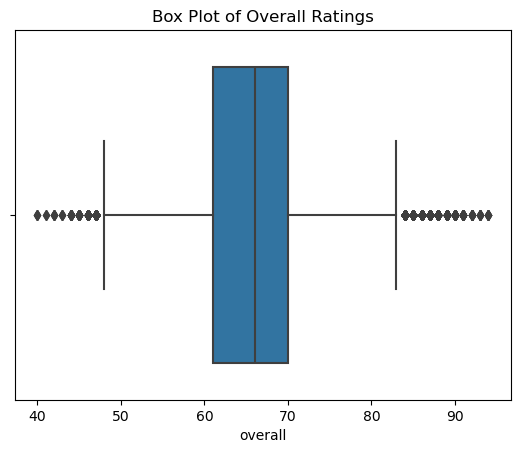

In [19]:
# Create box plot
sns.boxplot(x=df['overall'])
plt.title('Box Plot of Overall Ratings')
plt.show()

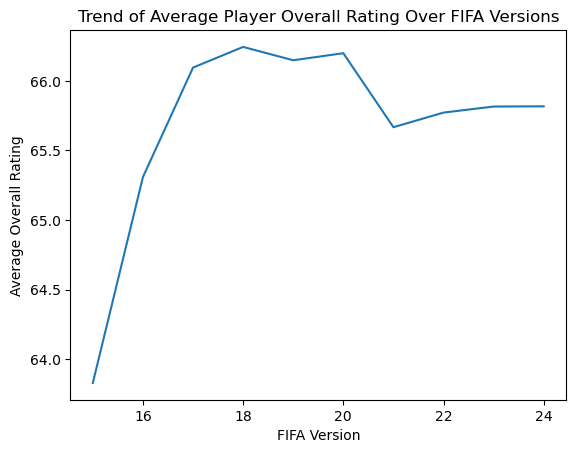

In [20]:
# Trend of average player overall rating over FIFA versions
time_series_df = df.groupby('fifa_version')['overall'].mean()
time_series_df.plot()
plt.title('Trend of Average Player Overall Rating Over FIFA Versions')
plt.xlabel('FIFA Version')
plt.ylabel('Average Overall Rating')
plt.savefig('trend_player_rating.png')
plt.show()

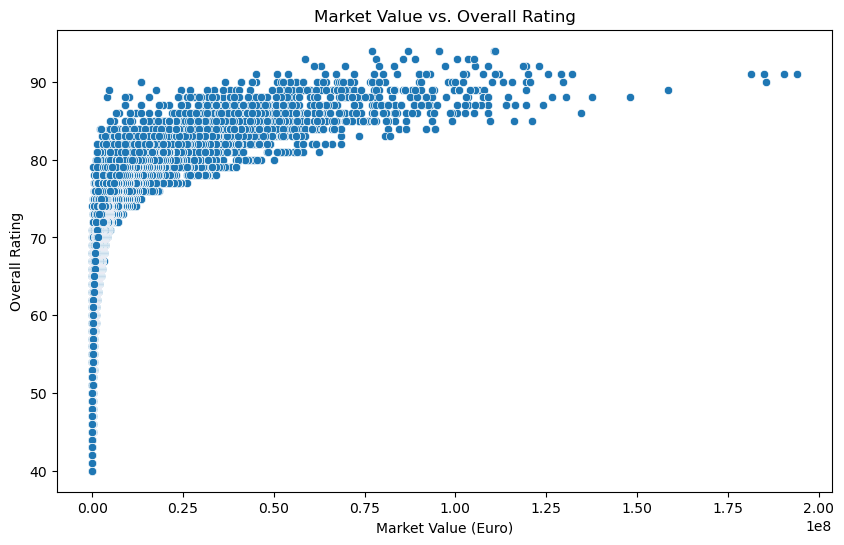

In [21]:
# Scattor plot to compare Overall Rating to Market Value
plt.figure(figsize=(10, 6))
sns.scatterplot(x='value_eur', y='overall', data=df)
plt.title('Market Value vs. Overall Rating')
plt.xlabel('Market Value (Euro)')
plt.ylabel('Overall Rating')
plt.show()


In [22]:
# Check unique values of numerical columns
df.select_dtypes("number").nunique().sort_values(ascending=False)

value_eur                      341
wage_eur                       154
skill_dribbling                 96
mentality_positioning           95
attacking_finishing             95
power_shot_power                94
goalkeeping_kicking             94
defending_marking_awareness     93
mentality_vision                93
defending_standing_tackle       93
skill_fk_accuracy               93
attacking_heading_accuracy      92
power_long_shots                92
skill_curve                     91
defending_sliding_tackle        91
attacking_volleys               91
skill_ball_control              91
mentality_penalties             91
mentality_interceptions         91
attacking_crossing              91
skill_long_passing              90
mentality_aggression            90
attacking_short_passing         89
mentality_composure             88
goalkeeping_positioning         88
movement_balance                87
power_stamina                   87
movement_sprint_speed           87
movement_acceleratio

In [23]:
# Check unique values of categorical columns
df.select_dtypes("object").nunique().sort_values(ascending=False)

long_name           52892
short_name          47272
player_positions     2031
club_name            1082
nationality_name      188
league_name            42
body_type              10
work_rate               9
preferred_foot          2
dtype: int64

In [24]:
potential_categorical_from_numerical = df.select_dtypes("number").loc[:, df.select_dtypes("number").nunique() < 20]
potential_categorical_from_numerical

,fifa_version,league_level,weak_foot,skill_moves,international_reputation
0,24,1.0,4,5,5
1,24,1.0,3,3,5
2,24,1.0,5,4,5
3,24,1.0,4,4,5
4,24,1.0,4,4,5
...,...,...,...,...,...
180016,15,4.0,2,2,1
180017,15,4.0,3,3,1
180018,15,1.0,3,2,1
180019,15,3.0,2,2,1


In [25]:
df_categorical = pd.concat([df.select_dtypes("object"), potential_categorical_from_numerical], axis=1)

# Adjusting the numerical dataframe by removing the moved columns
df_numerical = df.select_dtypes("number").drop(columns=potential_categorical_from_numerical.columns)

In [26]:
# Verify that the total number of columns in the dataframe is the sum of object (string) and numerical columns
len(df.columns) == len(df.select_dtypes("object").columns) + len(df.select_dtypes("number").columns)

True

In [27]:
df_numerical = df_numerical.dropna(subset=['value_eur', 'wage_eur', 'mentality_composure'])

In [28]:
spearman_correlations = df_numerical.corrwith(df['overall'], method='spearman')

In [29]:
spearman_correlations_sorted = spearman_correlations.sort_values(ascending=False)
spearman_correlations_sorted

overall                        1.000000
value_eur                      0.894203
movement_reactions             0.856813
wage_eur                       0.786738
mentality_composure            0.719951
skill_ball_control             0.631492
attacking_short_passing        0.628577
potential                      0.621214
passing                        0.573347
dribbling                      0.545235
power_shot_power               0.539478
skill_long_passing             0.527708
mentality_vision               0.516768
skill_dribbling                0.504666
age                            0.492541
attacking_crossing             0.459949
power_long_shots               0.455025
physic                         0.451523
mentality_positioning          0.443010
skill_curve                    0.441300
power_stamina                  0.440645
mentality_aggression           0.435345
shooting                       0.425169
attacking_heading_accuracy     0.416770
skill_fk_accuracy              0.385720


In [30]:
pearson_correlations = df_numerical.corrwith(df['overall'])

In [31]:
pearson_correlations_sorted = pearson_correlations.sort_values(ascending=False)
pearson_correlations_sorted

overall                        1.000000
movement_reactions             0.859581
mentality_composure            0.685795
potential                      0.663435
wage_eur                       0.592892
value_eur                      0.571845
attacking_short_passing        0.508703
mentality_vision               0.506291
power_shot_power               0.500601
skill_long_passing             0.492473
age                            0.460630
skill_ball_control             0.459861
skill_curve                    0.418712
power_long_shots               0.412463
mentality_aggression           0.401529
attacking_crossing             0.399080
skill_fk_accuracy              0.389674
attacking_volleys              0.381384
power_stamina                  0.374847
skill_dribbling                0.373919
passing                        0.371495
power_strength                 0.360007
mentality_positioning          0.354851
attacking_heading_accuracy     0.344344
mentality_penalties            0.339510


In [32]:
df_categorical

,short_name,long_name,player_positions,club_name,league_name,nationality_name,preferred_foot,work_rate,body_type,fifa_version,league_level,weak_foot,skill_moves,international_reputation
0,K. Mbappé,Kylian Mbappé Lottin,"ST, LW",Paris Saint Germain,Ligue 1,France,Right,High/Low,Unique,24,1.0,4,5,5
1,E. Haaland,Erling Braut Haaland,ST,Manchester City,Premier League,Norway,Left,High/Medium,Unique,24,1.0,3,3,5
2,K. De Bruyne,Kevin De Bruyne,"CM, CAM",Manchester City,Premier League,Belgium,Right,High/Medium,Unique,24,1.0,5,4,5
3,L. Messi,Lionel Andrés Messi Cuccittini,"CF, CAM",Inter Miami,Major League Soccer,Argentina,Left,Low/Low,Unique,24,1.0,4,4,5
4,K. Benzema,Karim Benzema,"CF, ST",Al Ittihad,Pro League,France,Right,Medium/Medium,Normal (170-185),24,1.0,4,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180016,E. Redman,Ellis Redman,CB,Newport County,League Two,Wales,Right,Medium/Medium,Normal (185+),15,4.0,2,2,1
180017,A. Collins,Aaron Graham John Collins,ST,Newport County,League Two,Wales,Right,Medium/Medium,Lean (170-185),15,4.0,3,3,1
180018,P. Żemło,Piotr Żemło,"LM, LB",Wisła Kraków,Ekstraklasa,Poland,Left,Medium/Medium,Normal (185+),15,1.0,3,2,1
180019,T. Davies,Thomas Christopher Davies,CB,Fleetwood Town,League One,England,Right,Medium/Medium,Normal (170-185),15,3.0,2,2,1


In [33]:
spearman_correlations_sorted_top = spearman_correlations_sorted[abs(spearman_correlations_sorted) > 0.5]
spearman_correlations_sorted_top

overall                    1.000000
value_eur                  0.894203
movement_reactions         0.856813
wage_eur                   0.786738
mentality_composure        0.719951
skill_ball_control         0.631492
attacking_short_passing    0.628577
potential                  0.621214
passing                    0.573347
dribbling                  0.545235
power_shot_power           0.539478
skill_long_passing         0.527708
mentality_vision           0.516768
skill_dribbling            0.504666
dtype: float64

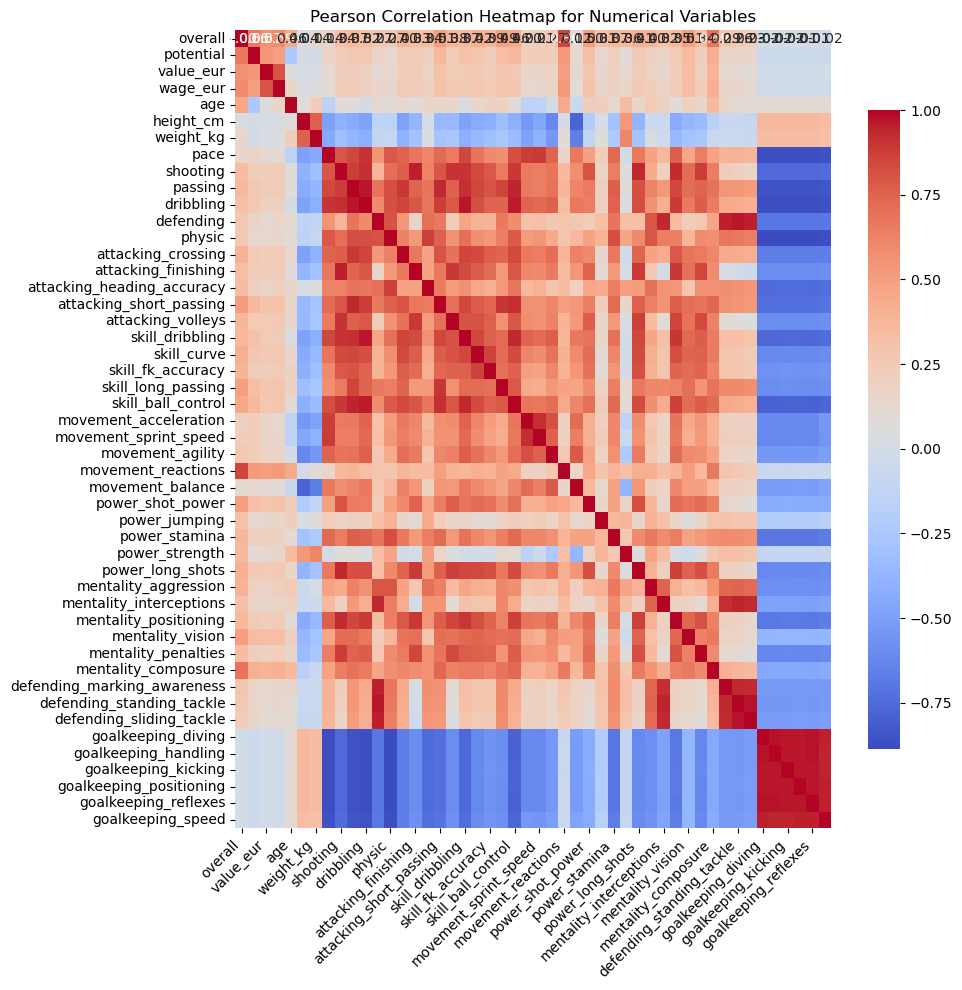

In [34]:
correlation_matrix_pearson = df_numerical.corr(method='pearson')  

plt.figure(figsize=(10, 10))

# Create heatmap for the numerical columns
sns.heatmap(correlation_matrix_pearson, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={"shrink": .8})

plt.title("Pearson Correlation Heatmap for Numerical Variables")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()  
plt.show()

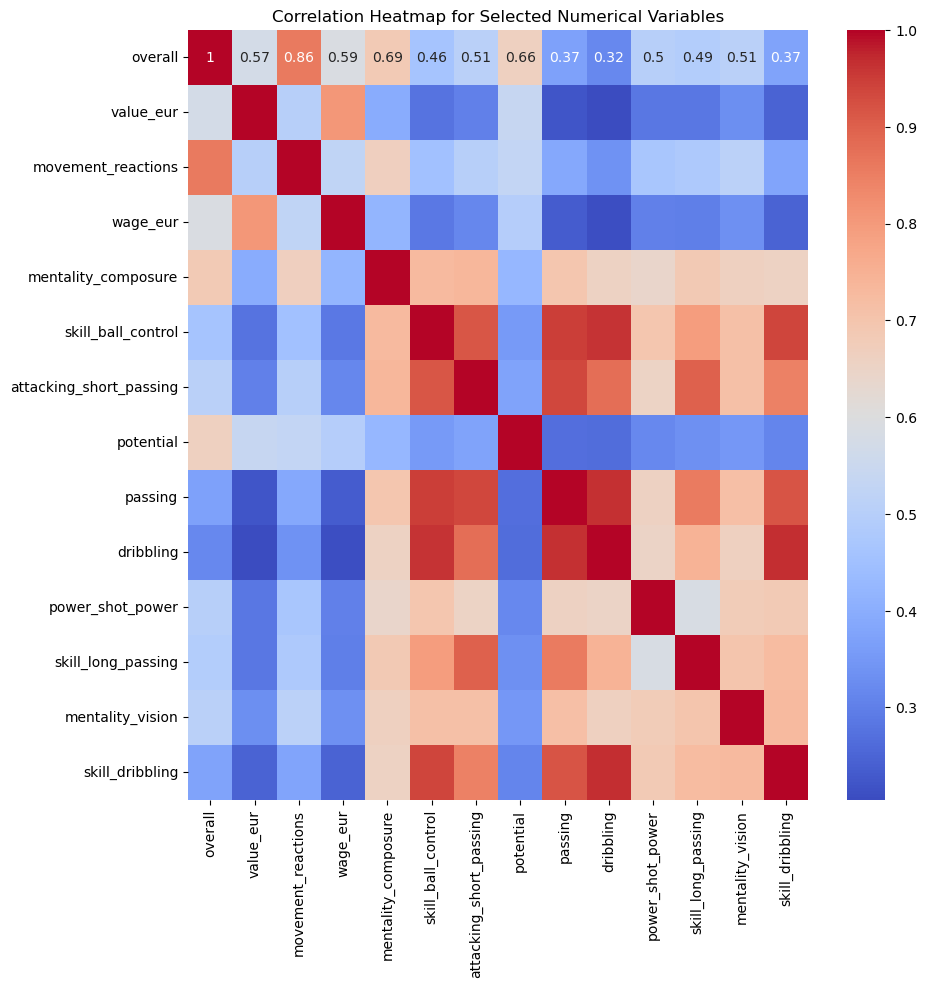

In [35]:
correlation_matrix = df_numerical[spearman_correlations_sorted_top.index].corr()

# Set up the matplotlib figure with an appropriate size
plt.figure(figsize=(10, 10))

# Draw the heatmap for the numerical columns
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

plt.title("Correlation Heatmap for Selected Numerical Variables")
plt.show()

/Users/kwameantwiadjei/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/kwameantwiadjei/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/kwameantwiadjei/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/kwameantwiadjei/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and wil

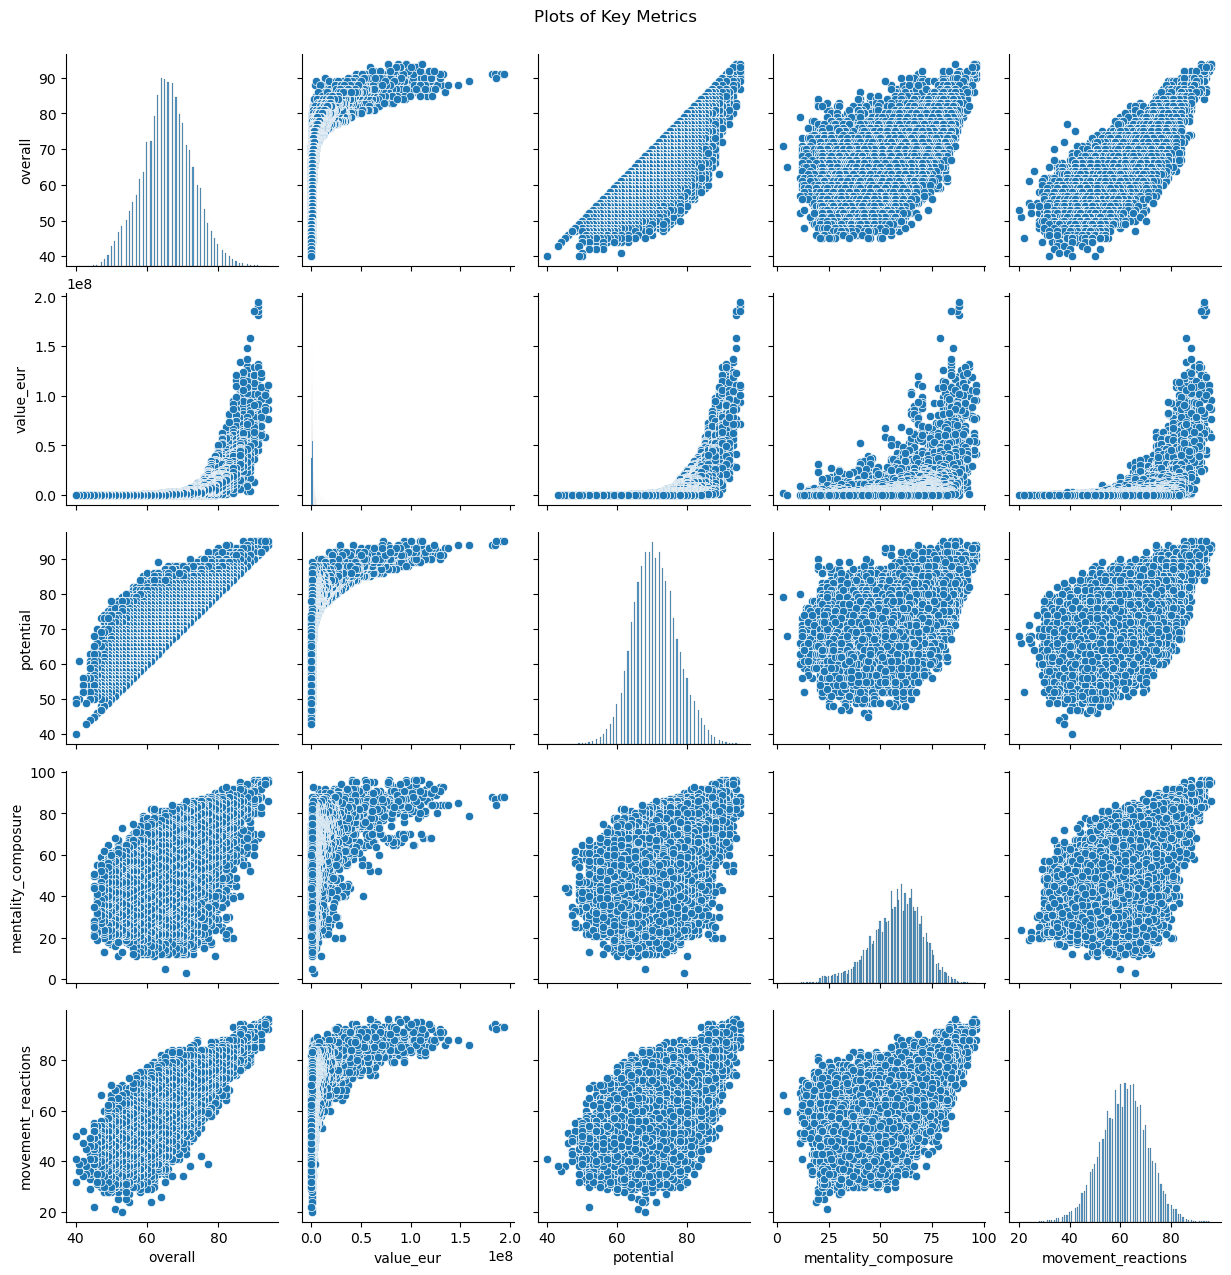

In [36]:
# Create a pairplot
sns.pairplot(df[['overall', 'value_eur', 'potential', 'mentality_composure', 'movement_reactions']])
plt.suptitle('Plots of Key Metrics', y=1.02)
plt.show()

In [37]:
# Group features by their roles
financial_features = ['age', 'value_eur', 'wage_eur']
technical_skills_features = ['skill_dribbling', 'attacking_finishing', 'power_shot_power',
                             'skill_fk_accuracy', 'attacking_heading_accuracy', 'power_long_shots',
                             'attacking_volleys', 'skill_curve', 'attacking_crossing', 'skill_long_passing',
                             'attacking_short_passing', 'skill_ball_control', 'shooting', 'dribbling', 'passing', 
                             'defending', 'defending_marking_awareness', 'defending_standing_tackle', 'defending_sliding_tackle']
physical_mental_features = ['mentality_positioning', 'mentality_vision', 'mentality_penalties',
                            'mentality_interceptions', 'mentality_aggression', 'mentality_composure',
                            'power_stamina', 'movement_sprint_speed', 'movement_acceleration',
                            'movement_agility', 'pace', 'physic', 'power_strength', 'power_jumping',
                            'movement_balance']


In [38]:
top_features = ['age', 'movement_reactions', 'value_eur', 'wage_eur', 
                'mentality_composure', 'potential']

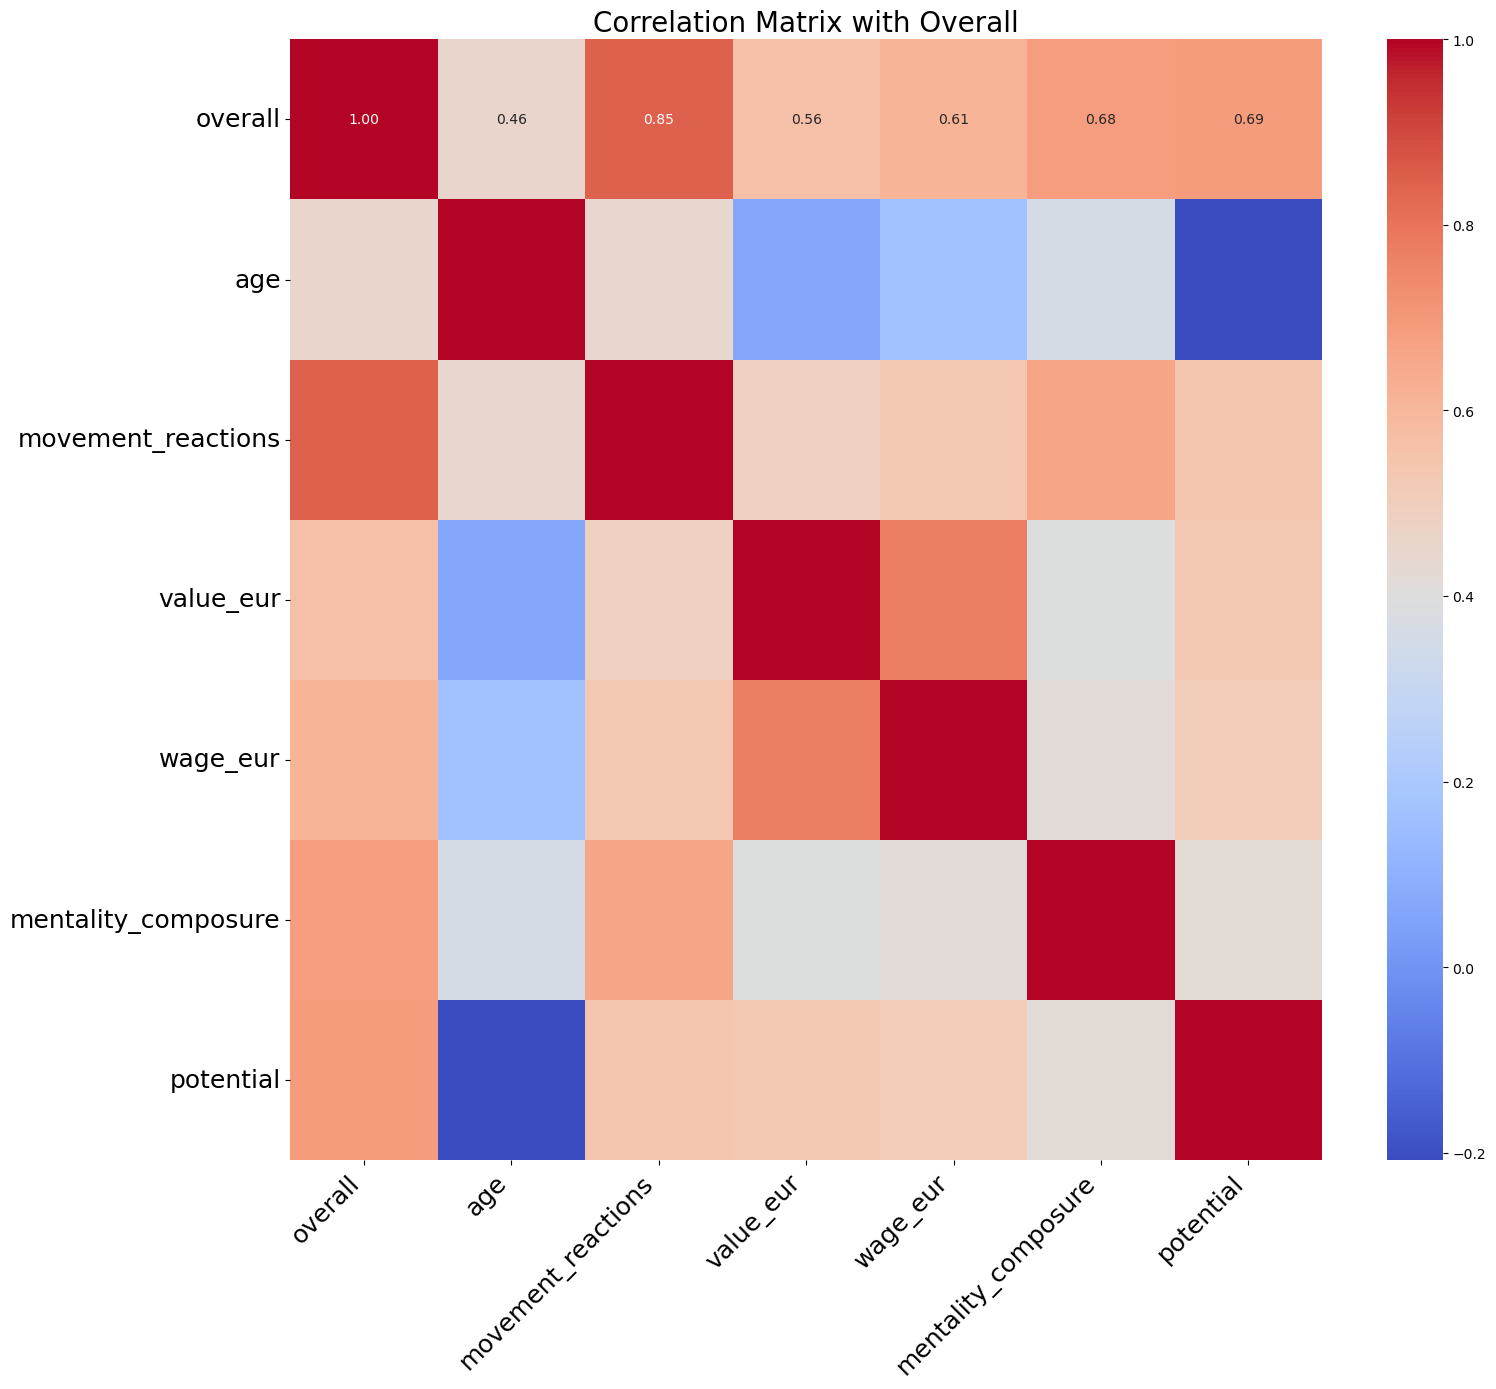

In [39]:
top_features_with_overall = ['overall'] + top_features
top_corr = df[top_features_with_overall].corr()

plt.figure(figsize=(16, 14))  
heatmap = sns.heatmap(top_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix with Overall', fontsize=20)

# Set the size for x-axis and y-axis labels directly
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=18, rotation=45, ha='right')
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=18, rotation=360)

plt.tight_layout()  # Adjust layout to make room for elements

plt.savefig('correlation_matrix8.png', dpi=300)
plt.show()

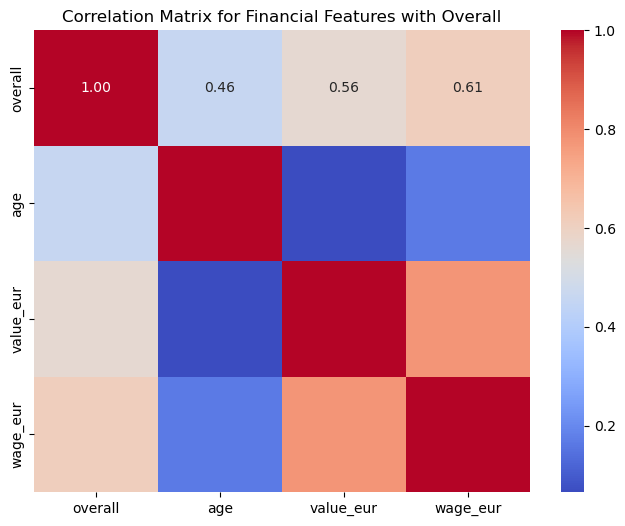

In [40]:
# Financial Features Correlation Matrix including 'overall'
financial_features_with_overall = ['overall'] + financial_features
financial_corr = df[financial_features_with_overall].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(financial_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Financial Features with Overall')
plt.show()

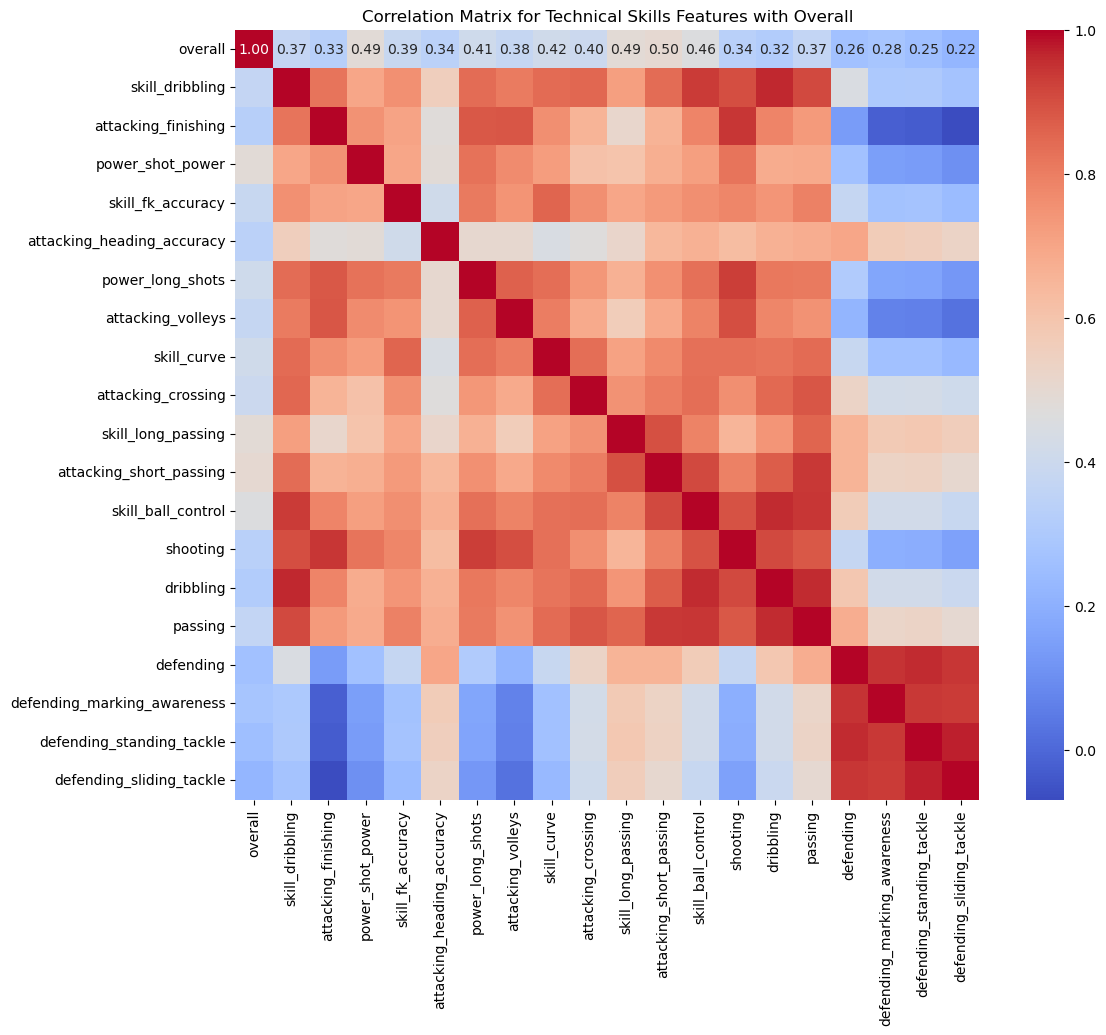

In [41]:
# Technical Skills Features Correlation Matrix including 'overall'
technical_skills_features_with_overall = ['overall'] + technical_skills_features
technical_corr = df[technical_skills_features_with_overall].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(technical_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Technical Skills Features with Overall')
plt.show()

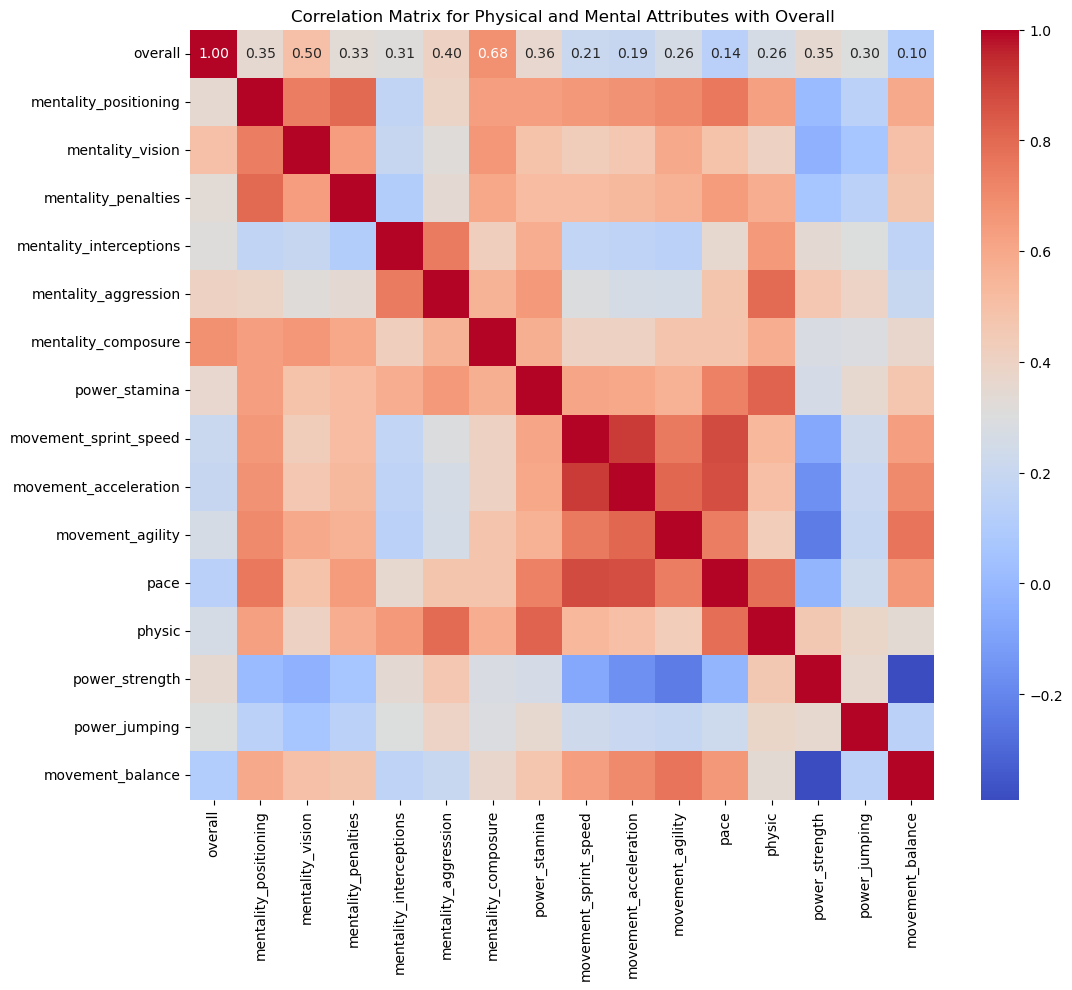

In [42]:
# Physical and Mental Attributes Correlation Matrix including 'overall'
physical_mental_features_with_overall = ['overall'] + physical_mental_features
physical_mental_corr = df[physical_mental_features_with_overall].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(physical_mental_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Physical and Mental Attributes with Overall')
plt.show()

In [43]:
df.head(20)

,fifa_version,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,height_cm,...,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
0,24,K. Mbappé,Kylian Mbappé Lottin,"ST, LW",91,94,181500000.0,230000.0,24,182,...,88.0,26,34,32,13,5,7,11,6,0.0
1,24,E. Haaland,Erling Braut Haaland,ST,91,94,185000000.0,340000.0,22,195,...,87.0,38,47,29,7,14,13,11,7,0.0
2,24,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,103000000.0,350000.0,32,181,...,88.0,66,70,53,15,13,5,10,13,0.0
3,24,L. Messi,Lionel Andrés Messi Cuccittini,"CF, CAM",90,90,41000000.0,23000.0,36,169,...,96.0,20,35,24,6,11,15,14,8,0.0
4,24,K. Benzema,Karim Benzema,"CF, ST",90,90,51000000.0,95000.0,35,185,...,90.0,43,24,18,13,11,5,5,7,0.0
5,24,R. Lewandowski,Robert Lewandowski,ST,90,90,58000000.0,340000.0,34,185,...,88.0,35,42,19,15,6,12,8,10,0.0
6,24,T. Courtois,Thibaut Nicolas Marc Courtois,GK,90,90,63000000.0,250000.0,31,199,...,66.0,20,18,16,85,89,76,90,93,46.0
7,24,H. Kane,Harry Kane,ST,90,90,119500000.0,170000.0,29,188,...,92.0,46,46,38,8,10,11,14,11,0.0
8,24,Vini Jr.,Vinícius José Paixão de Oliveira Júnior,LW,89,94,158500000.0,310000.0,22,176,...,79.0,32,25,18,5,7,7,7,10,0.0
9,24,Alisson,Alisson Ramsés Becker,GK,89,90,77500000.0,180000.0,30,193,...,66.0,15,19,16,86,85,85,90,89,56.0


In [44]:
df_categorical_encoded = pd.get_dummies(df_categorical, columns=[
    'player_positions', 'work_rate', 'body_type'
])

In [45]:
df_categorical_encoded.drop(['short_name', 'long_name', 'club_name', 'league_name', 'nationality_name', 'preferred_foot'],  axis=1, inplace=True)

In [46]:
df_final = pd.concat([df_numerical, df_categorical_encoded], axis=1)

In [47]:
df_final

,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,pace,shooting,passing,...,body_type_Lean (170-),body_type_Lean (170-185),body_type_Lean (185+),body_type_Normal (170-),body_type_Normal (170-185),body_type_Normal (185+),body_type_Stocky (170-),body_type_Stocky (170-185),body_type_Stocky (185+),body_type_Unique
0,91.0,94.0,181500000.0,230000.0,24.0,182.0,75.0,97.0,90.0,80.0,...,False,False,False,False,False,False,False,False,False,True
1,91.0,94.0,185000000.0,340000.0,22.0,195.0,94.0,89.0,93.0,66.0,...,False,False,False,False,False,False,False,False,False,True
2,91.0,91.0,103000000.0,350000.0,32.0,181.0,75.0,72.0,88.0,94.0,...,False,False,False,False,False,False,False,False,False,True
3,90.0,90.0,41000000.0,23000.0,36.0,169.0,67.0,80.0,87.0,90.0,...,False,False,False,False,False,False,False,False,False,True
4,90.0,90.0,51000000.0,95000.0,35.0,185.0,81.0,79.0,88.0,83.0,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,True,False,False,False,False
180017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,True,False,False,False,False,False,False,False,False
180018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,True,False,False,False,False
180019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,True,False,False,False,False,False


In [48]:
df_final['mentality_composure'].isna().sum()

34430

In [49]:
df_final.columns[df_final.isnull().any()].tolist()

['overall',
 'potential',
 'value_eur',
 'wage_eur',
 'age',
 'height_cm',
 'weight_kg',
 'pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic',
 'attacking_crossing',
 'attacking_finishing',
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'movement_acceleration',
 'movement_sprint_speed',
 'movement_agility',
 'movement_reactions',
 'movement_balance',
 'power_shot_power',
 'power_jumping',
 'power_stamina',
 'power_strength',
 'power_long_shots',
 'mentality_aggression',
 'mentality_interceptions',
 'mentality_positioning',
 'mentality_vision',
 'mentality_penalties',
 'mentality_composure',
 'defending_marking_awareness',
 'defending_standing_tackle',
 'defending_sliding_tackle',
 'goalkeeping_diving',
 'goalkeeping_handling',
 'goalkeeping_kicking',
 'goalkeeping_positioning',
 'goalkeeping_reflexes',
 'goalkeeping_speed',
 'leag

In [50]:
df_final = df_final.dropna(subset=['mentality_composure'])

In [51]:
df_final = df_final.dropna(subset=['value_eur', 'wage_eur', 'league_level'])

In [52]:
df_final

,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,pace,shooting,passing,...,body_type_Lean (170-),body_type_Lean (170-185),body_type_Lean (185+),body_type_Normal (170-),body_type_Normal (170-185),body_type_Normal (185+),body_type_Stocky (170-),body_type_Stocky (170-185),body_type_Stocky (185+),body_type_Unique
0,91.0,94.0,181500000.0,230000.0,24.0,182.0,75.0,97.0,90.0,80.0,...,False,False,False,False,False,False,False,False,False,True
1,91.0,94.0,185000000.0,340000.0,22.0,195.0,94.0,89.0,93.0,66.0,...,False,False,False,False,False,False,False,False,False,True
2,91.0,91.0,103000000.0,350000.0,32.0,181.0,75.0,72.0,88.0,94.0,...,False,False,False,False,False,False,False,False,False,True
3,90.0,90.0,41000000.0,23000.0,36.0,169.0,67.0,80.0,87.0,90.0,...,False,False,False,False,False,False,False,False,False,True
4,90.0,90.0,51000000.0,95000.0,35.0,185.0,81.0,79.0,88.0,83.0,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147128,45.0,59.0,70000.0,1000.0,20.0,180.0,80.0,0.0,0.0,0.0,...,False,False,False,False,True,False,False,False,False,False
147129,45.0,59.0,60000.0,500.0,18.0,183.0,75.0,0.0,0.0,0.0,...,False,False,False,False,True,False,False,False,False,False
147130,45.0,56.0,50000.0,500.0,20.0,185.0,80.0,0.0,0.0,0.0,...,False,False,False,False,False,True,False,False,False,False
147131,45.0,54.0,35000.0,500.0,18.0,183.0,82.0,0.0,0.0,0.0,...,False,False,False,False,True,False,False,False,False,False


In [53]:
features = ['age', 'movement_reactions', 'value_eur', 'wage_eur', 'mentality_composure', 
            'potential', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']
target = 'overall'

In [54]:
X = df_final[features]
y = df_final[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [56]:
y_pred_rf = rf_model.predict(X_test)
y_pred_rf

array([64.98, 71.  , 63.6 , ..., 64.03, 63.  , 66.9 ])

In [57]:
mse_rf = mean_squared_error(y_test, y_pred_rf)
mse_rf

0.5340131129476584

In [58]:
r2_rf = r2_score(y_test, y_pred_rf)
r2_rf

0.9891670679058076

In [59]:
rmse_rf = np.sqrt(mse_rf)
rmse_rf

0.7307620084183758

In [60]:
gbm = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbm.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [61]:
y_pred_gbm = gbm.predict(X_test)
y_pred_gbm

array([65.04284813, 70.69967946, 65.32627078, ..., 63.97009986,
       62.62959942, 67.58092251])

In [62]:
mse_gbm = mean_squared_error(y_test, y_pred_gbm)
mse_gbm

1.2747785859167473

In [63]:
rmse_gbm = np.sqrt(mse_gbm)
rmse_gbm

1.1290609310027282

In [64]:
r2_gbm = r2_score(y_test, y_pred_gbm)
r2_gbm

0.9741399798590333

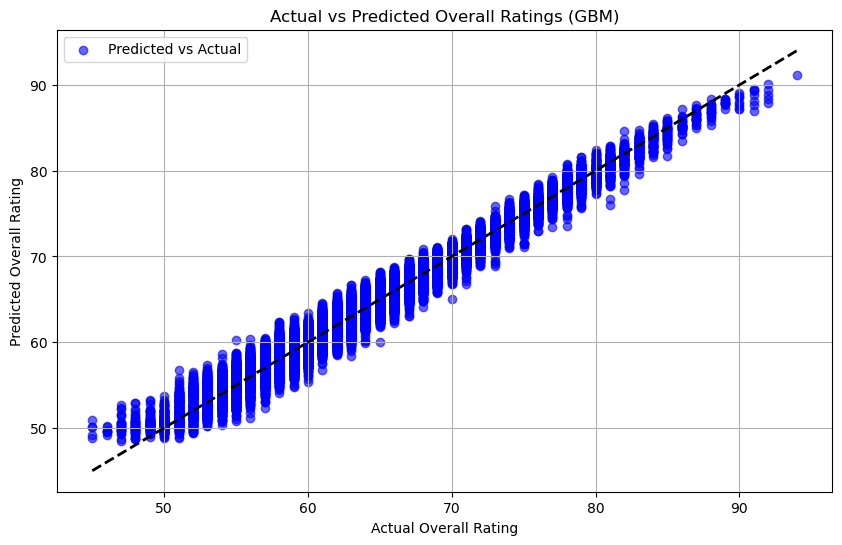

<Figure size 640x480 with 0 Axes>

In [65]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_gbm, color='blue', label='Predicted vs Actual', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Adds a reference line
plt.xlabel('Actual Overall Rating')
plt.ylabel('Predicted Overall Rating')
plt.title('Actual vs Predicted Overall Ratings (GBM)')
plt.legend()
plt.grid(True)
plt.show()
plt.savefig('GBM_performance.png')

In [66]:
scaler = StandardScaler()
features = df_final.drop('overall', axis=1)

In [67]:
scaled_features = scaler.fit_transform(features)
scaled_df = pd.DataFrame(scaled_features, columns=features.columns)

In [68]:
scaled_df['overall'] = df_final['overall']
scaled_df.head()

,potential,value_eur,wage_eur,age,height_cm,weight_kg,pace,shooting,passing,dribbling,...,body_type_Lean (170-185),body_type_Lean (185+),body_type_Normal (170-),body_type_Normal (170-185),body_type_Normal (185+),body_type_Stocky (170-),body_type_Stocky (170-185),body_type_Stocky (185+),body_type_Unique,overall
0,3.717127,27.028710,10.569433,-0.250747,0.098044,-0.025434,1.534268,2.064337,1.428700,1.676782,...,-0.527734,-0.341504,-0.187771,-0.725245,-0.522995,-0.074713,-0.181428,-0.141826,15.845445,91.0
1,3.717127,27.557489,15.848809,-0.679393,2.013890,2.682846,1.198258,2.206683,0.743932,1.126326,...,-0.527734,-0.341504,-0.187771,-0.725245,-0.522995,-0.074713,-0.181428,-0.141826,15.845445,91.0
2,3.229574,15.168953,16.328752,1.463837,-0.049328,-0.025434,0.484236,1.969439,2.113468,1.447425,...,-0.527734,-0.341504,-0.187771,-0.725245,-0.522995,-0.074713,-0.181428,-0.141826,15.845445,91.0
3,3.067056,5.802011,0.634606,2.321128,-1.817801,-1.165763,0.820247,1.921991,1.917820,1.768524,...,-0.527734,-0.341504,-0.187771,-0.725245,-0.522995,-0.074713,-0.181428,-0.141826,15.845445,90.0
4,3.067056,7.312808,4.090198,2.106805,0.540163,0.829812,0.778245,1.969439,1.575436,1.447425,...,-0.527734,-0.341504,-0.187771,1.378845,-0.522995,-0.074713,-0.181428,-0.141826,-0.063110,90.0


In [69]:
scaled_df.isna().sum()

potential                        0
value_eur                        0
wage_eur                         0
age                              0
height_cm                        0
                              ... 
body_type_Stocky (170-)          0
body_type_Stocky (170-185)       0
body_type_Stocky (185+)          0
body_type_Unique                 0
overall                       1922
Length: 2103, dtype: int64

In [70]:
scaled_df = scaled_df.dropna(subset=['overall'])

In [71]:
X_scaled = scaled_df.drop('overall', axis=1)  
y_scaled = scaled_df['overall']  

X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)


In [72]:
knn_scaled = KNeighborsRegressor(n_neighbors=5)
knn_scaled.fit(X_train_scaled, y_train_scaled)

KNeighborsRegressor()

In [73]:
y_pred_scaled = knn_scaled.predict(X_test_scaled)
y_pred_scaled

array([62.8, 67.2, 71.8, ..., 73.6, 64.6, 67.4])

In [74]:
mse_scaled = mean_squared_error(y_test_scaled, y_pred_scaled)
mse_scaled

21.883058454021988

In [75]:
rmse_scaled = np.sqrt(mse_scaled)
rmse_scaled

4.67793313911411

In [76]:
r2_scaled = r2_score(y_test_scaled, y_pred_scaled)
r2_scaled

0.5383548226653359

In [77]:
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train_scaled)

LinearRegression()

In [78]:
y_pred_lr = lr_model.predict(X_test_scaled)
y_pred_lr

array([63.70996094, 68.64685059, 70.23181152, ..., 70.97296143,
       64.55780029, 64.49938965])

In [79]:
mse_lr = mean_squared_error(y_test_scaled, y_pred_scaled)
mse_lr

21.883058454021988

In [80]:
rmse_lr = np.sqrt(mse_lr)
rmse_lr

4.67793313911411

In [81]:
r2_lr = r2_score(y_test_scaled, y_pred_scaled)
r2_lr

0.5383548226653359

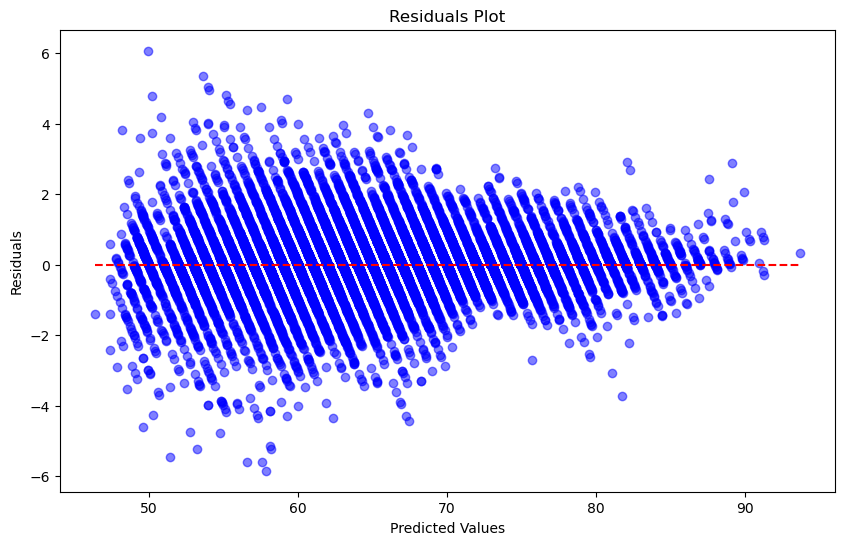

In [82]:
residuals = y_test - y_pred_rf

# Plotting the residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_rf, residuals, color='blue', alpha=0.5)
plt.hlines(y=0, xmin=y_pred_rf.min(), xmax=y_pred_rf.max(), colors='red', linestyles='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()

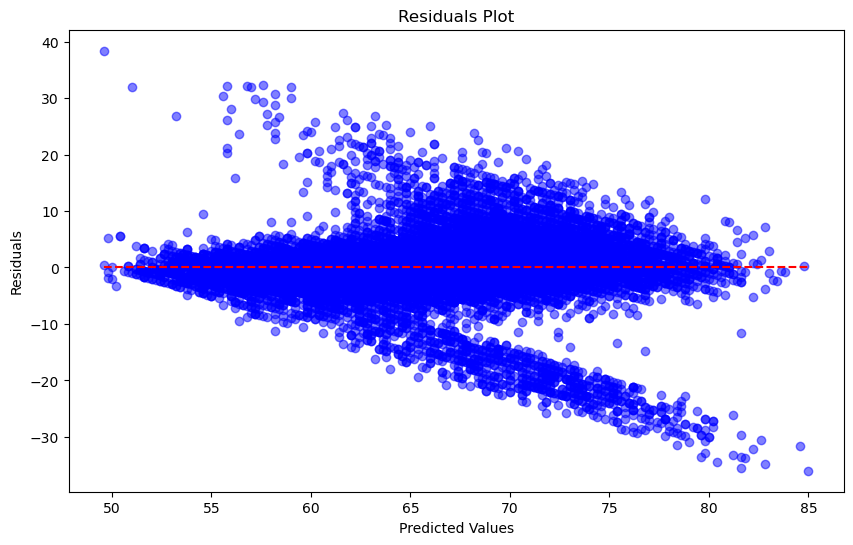

In [83]:
residuals = y_test_scaled - y_pred_scaled

# Plot the residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_scaled, residuals, color='blue', alpha=0.5)
plt.hlines(y=0, xmin=y_pred_scaled.min(), xmax=y_pred_scaled.max(), colors='red', linestyles='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()

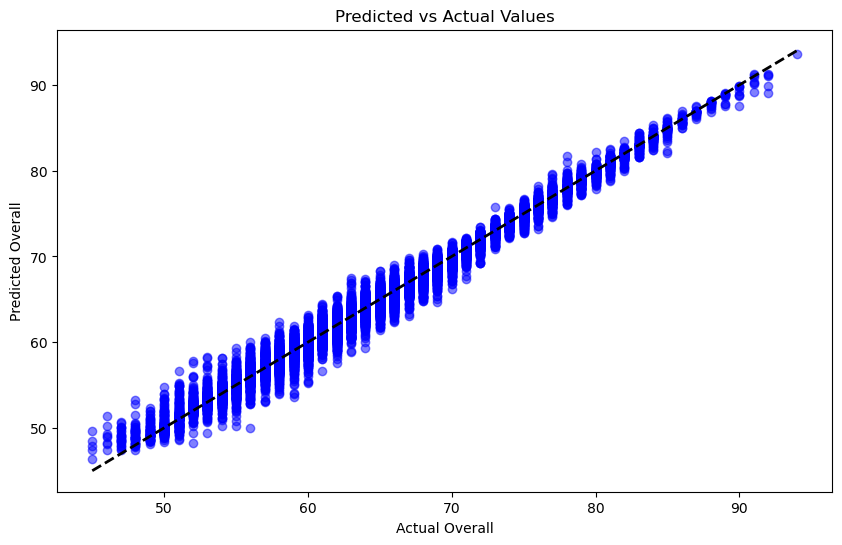

In [84]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line
plt.xlabel('Actual Overall')
plt.ylabel('Predicted Overall')
plt.title('Predicted vs Actual Values')
plt.show()

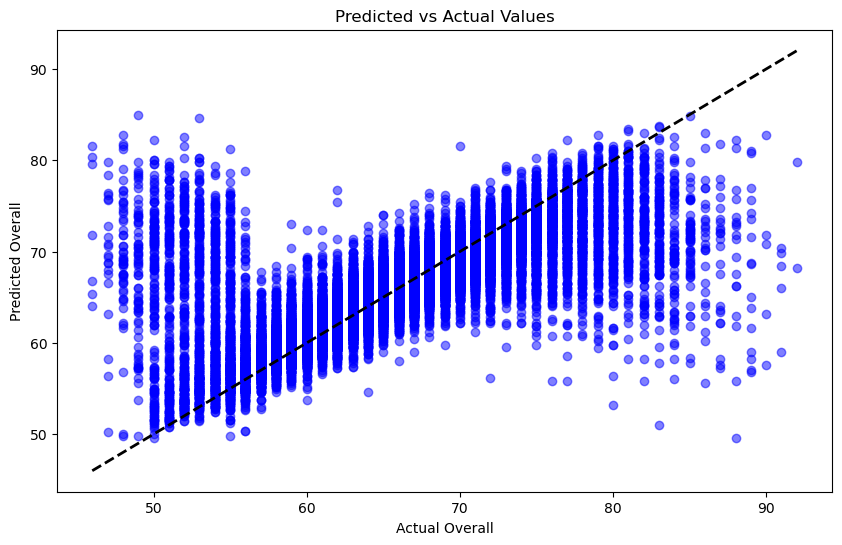

<Figure size 640x480 with 0 Axes>

In [85]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test_scaled, y_pred_scaled, alpha=0.5, color='blue')
plt.plot([y_test_scaled.min(), y_test_scaled.max()], [y_test_scaled.min(), y_test_scaled.max()], 'k--', lw=2)  # Diagonal line
plt.xlabel('Actual Overall')
plt.ylabel('Predicted Overall')
plt.title('Predicted vs Actual Values')
plt.show()
plt.savefig('LR_performance2.png')

In [86]:
df_full = pd.read_csv('male_players.csv')

/var/folders/nn/ll6658s95d93z1m4mj_4pqh80000gn/T/ipykernel_58279/4181075401.py:1: DtypeWarning: Columns (108) have mixed types. Specify dtype option on import or set low_memory=False.
  df_full = pd.read_csv('male_players.csv')


In [87]:
df_long = df_full.melt(id_vars=['short_name'], value_vars=['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic'],
                  var_name='attribute', value_name='value')

In [88]:
df_long

,short_name,attribute,value
0,K. Mbappé,pace,97.0
1,E. Haaland,pace,89.0
2,K. De Bruyne,pace,72.0
3,L. Messi,pace,80.0
4,K. Benzema,pace,79.0
...,...,...,...
1080121,E. Redman,physic,53.0
1080122,A. Collins,physic,41.0
1080123,P. Żemło,physic,68.0
1080124,T. Davies,physic,61.0


In [89]:
df_long.drop_duplicates(subset=['short_name', 'attribute'], inplace=True)

In [90]:
df_full = pd.merge(df_full, df_long, on='short_name')

In [91]:
df_full.to_csv('male_players_clean.csv', index=False)

In [92]:
joblib.dump(rf_model, 'random_forest_model.joblib')

['random_forest_model.joblib']